# Overview of the example data set
* data basis is taken from [kaggle](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
* this was then enriched with additional metadata from Wikipedia and subsequently filtered

## Import example dataset

In [1]:
movies <- readr::read_csv("Data/movies.csv")

Parsed with column specification:
cols(
  `Release Year` = col_double(),
  Title = col_character(),
  `Origin/Ethnicity` = col_character(),
  Director = col_character(),
  Cast = col_character(),
  Genre = col_character(),
  `Wiki Page` = col_character(),
  Plot = col_character(),
  `Running time` = col_double(),
  Budget = col_character(),
  `Box office` = col_character()
)


In [2]:
# check dimensions of imported data
dim(movies)
# check which information is present
colnames(movies)

[1] 5210   11

[1] "Release Year"     "Title"            "Origin/Ethnicity" "Director"        
 [5] "Cast"             "Genre"            "Wiki Page"        "Plot"            
 [9] "Running time"     "Budget"           "Box office"

### General information

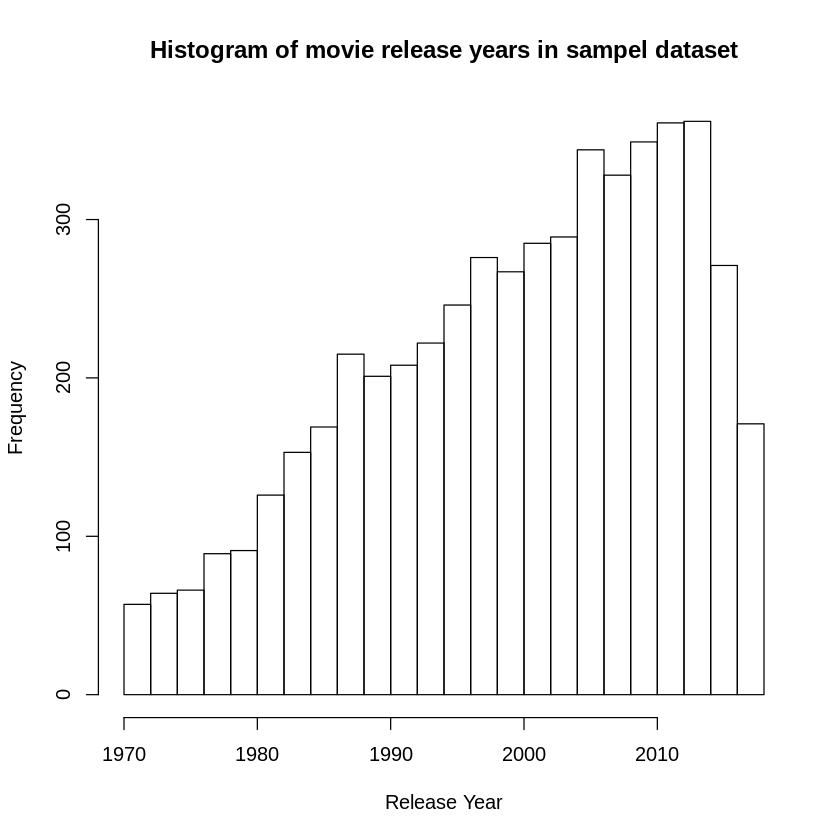

In [7]:
hist(movies$`Release Year`,breaks = 20, xlab = "Release Year",
     main = "Histogram of movie release years in sample dataset")

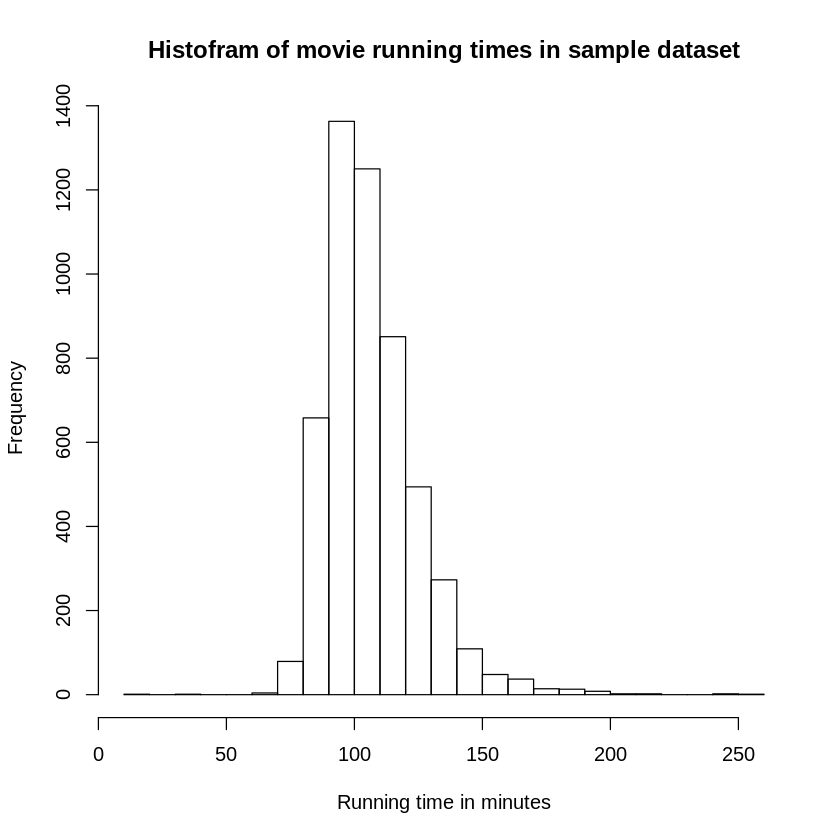

In [9]:
hist(as.numeric(movies$`Running time`),breaks = 20, xlab = "Running time in minutes",
    main = "Histofram of movie running times in sample dataset")

### Informations about Fight Club: 
![alt text](www/Fight-Club.jpg "Cover Fight Club")

In [5]:
# get informations for Fight Club
fightclub_row <- which(movies$Title == "Fight Club")
# get Cast of Fight Club
movies$Cast[fightclub_row]
# get Running Time for Fight Club
movies$`Running time`[fightclub_row]
# get Plot for Fight Club
movies$Plot[fightclub_row]

[1] "Release Year"     "Title"            "Origin/Ethnicity" "Director"        
 [5] "Cast"             "Genre"            "Wiki Page"        "Plot"            
 [9] "Running time"     "Budget"           "Box office"

[1] "Brad Pitt,Edward Norton,Helena Bonham Carter"

[1] 139

[1] "The unnamed Narrator is a traveling automobile recall specialist who suffers from insomnia. When he is unsuccessful at receiving medical assistance for it, the admonishing doctor suggests he realize his relatively small amount of suffering by visiting a support group for testicular cancer victims. The group assumes that he, too, is affected like they are, and he spontaneously weeps into the nurturing arms of another man, finding a freedom from the catharsis that relieves his insomnia. He decides to participate in support groups of various kinds, always allowing the groups to assume that he suffers what they do. However, he begins to notice another impostor, Marla Singer, whose presence reminds him that he is attending these groups dishonestly, and this disturbs his bliss. The two negotiate to avoid their attending the same groups, but, before going their separate ways, Marla gives him her phone number.\r\nOn a flight home from a business trip, the Narrator meets Tyler Durden, a soap salesman with whom he begins to converse after noticing the two share the same kind of briefcase. After the flight, the Narrator returns home to find that his apartment has been destroyed by an explosion. With no one else to contact, he calls Tyler, and they meet at a bar. After a conversation about consumerism, outside the bar, Tyler chastises the Narrator for his timidity about needing a place to stay. Tyler requests that the Narrator hit him, which leads the two to engage in a fistfight. The Narrator moves into Tyler's home, a large dilapidated house in an industrial area of their city. They have further fights outside the bar on subsequent nights, and these fights attract growing crowds of men. The fighting eventually moves to the bar's basement where the men form a club (\"Fight Club\") which routinely meets only to provide an opportunity for the men to fight recreationally.\r\nMarla overdoses on pills and telephones the Narrator for help; he eventually ignores her, leaving his phone receiver without disconnecting. Tyler notices the phone soon after, talks to her and goes to her apartment to save her. Tyler and Marla become sexually involved. He warns the Narrator never to talk to Marla about him. More fight clubs form across the country and, under Tyler's leadership (and without the Narrator's knowledge), they become an anti-materialist and anti-corporate organization, Project Mayhem, with many of the former local Fight Club members moving into the dilapidated house and improving it.\r\nThe Narrator complains to Tyler about Tyler excluding him from the newer manifestation of the Fight Club organization Project Mayhem. Soon after, Tyler leaves the house without notice. When a member of Project Mayhem is killed by the police during a botched sabotage operation, the Narrator tries to shut down the project. Seeking Tyler, he follows evidence of Tyler's national travels. In one city, a Project Mayhem member greets the Narrator as Tyler Durden. The Narrator calls Marla from his hotel room and discovers that Marla also believes him to be Tyler. Tyler suddenly appears in his hotel room, and reveals that they are dissociated personalities in the same body. When the Narrator has believed himself to be asleep, Tyler has been controlling his body and traveling to different locations.\r\nThe Narrator blacks out after the conversation, and when he awakes, he uncovers Tyler's plans to erase debt by destroying buildings that contain credit card companies' records. The Narrator tries to warn the police, but he finds that these officers are members of the Project. He attempts to disarm the explosives in a building, but Tyler subdues him and moves him to the uppermost floor. Held at gunpoint by Tyler, the Narrator realizes that, in sharing the same body with Tyler, he himself is actually in control holding \"Tyler's\" gun. The Narrator fires it into his own mouth, shooting through the cheek without killing himself. Tyler collapses with an exit wound to the

### Tom Hanks movies
![alt text](www/Tom-Hanks.jpeg "Tom Hanks")

In [6]:
# in which movies has tom hanks starred
tom_hanks_movies <- movies[which(grepl(x = movies$Cast, pattern = "Tom Hanks")),c("Release Year","Title")]
# sort movies with Tom Hanks by Release Year
tom_hanks_movies[order(tom_hanks_movies$'Release Year'),]



Release Year,Title
<dbl>,<chr>
1984,Bachelor Party
1984,Splash
1985,The Man with One Red Shoe
1986,Every Time We Say Goodbye
1987,Dragnet
1988,Big
1989,The 'Burbs
1990,Joe Versus the Volcano
1990,The Bonfire of the Vanities


## Creation of  a movie times actor matrix
Problem: movies$Cast usually has more than one actor seperated by ",". We can split it with function str_split() from stringr package.
![alt text](www/good-will-hunting.jpg "Good Will Hunting Cover")

In [12]:
# how to split several values in one cell
library(stringr)
# Cast of 'Good Will Hunting'
movies$Cast[1613]
str_split(string = movies$Cast[1613],pattern = ",")

[1] "Matt Damon,Robin Williams,Ben Affleck,Minnie Driver,Stellan Skarsgård"

[[1]]
[1] "Matt Damon"        "Robin Williams"    "Ben Affleck"      
[4] "Minnie Driver"     "Stellan Skarsgård"

In [14]:
# apply this for all movies
actor_list <- str_split(string = movies$Cast, pattern = ",",simplify = F)
class(actor_list)
# use list elements with [[id]]
actor_list[[1613]]

[1] "list"

[1] "Matt Damon"        "Robin Williams"    "Ben Affleck"      
[4] "Minnie Driver"     "Stellan Skarsgård"

In [15]:
# cast every list element into a data.frame containing a column for every actor in the certain movie
for(i in 1:length(actor_list)){
  data <- data.frame(t(rep(1,length(actor_list[[i]]))))
  colnames(data) <- actor_list[[i]]
  actor_list[[i]] <- data
}
actor_list[[1613]]

Matt Damon,Robin Williams,Ben Affleck,Minnie Driver,Stellan Skarsgård
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1


In [16]:
# bind all data.frame to a big data.frame containing all movies and all actors with value 1 in cell [i,j],
# if in movie i actor j appears
movie_actor_matrix <- data.table::rbindlist(l = actor_list, fill = T)
# repalce NA's with 0's
movie_actor_matrix[which(is.na(movie_actor_matrix),arr.ind = T)] <- 0
# sort matrix by actor appearances
col_order <- as.numeric(order(colSums(movie_actor_matrix),decreasing=T))
movie_actor_matrix <- as.matrix(movie_actor_matrix)[,col_order]
# set rownames of matrix to movie titles
rownames(movie_actor_matrix) <- movies$Title
dim(movie_actor_matrix)

[1] 5210 6911

In [17]:
# Which actor has starred in the most films
sort(colSums(movie_actor_matrix), decreasing = T)[1:10]

Robert De Niro Samuel L. Jackson      Bruce Willis      Nicolas Cage 
               59                52                51                51 
   Morgan Freeman      Meryl Streep      Jeff Bridges      John Goodman 
               49                45                42                40 
      Johnny Depp        Matt Damon 
               40                40

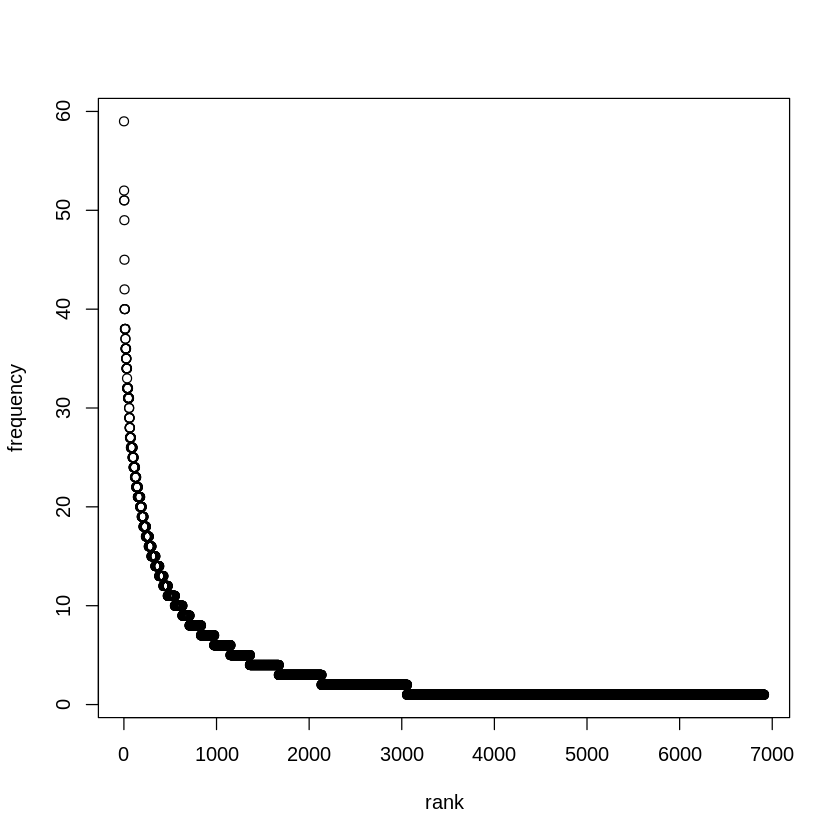

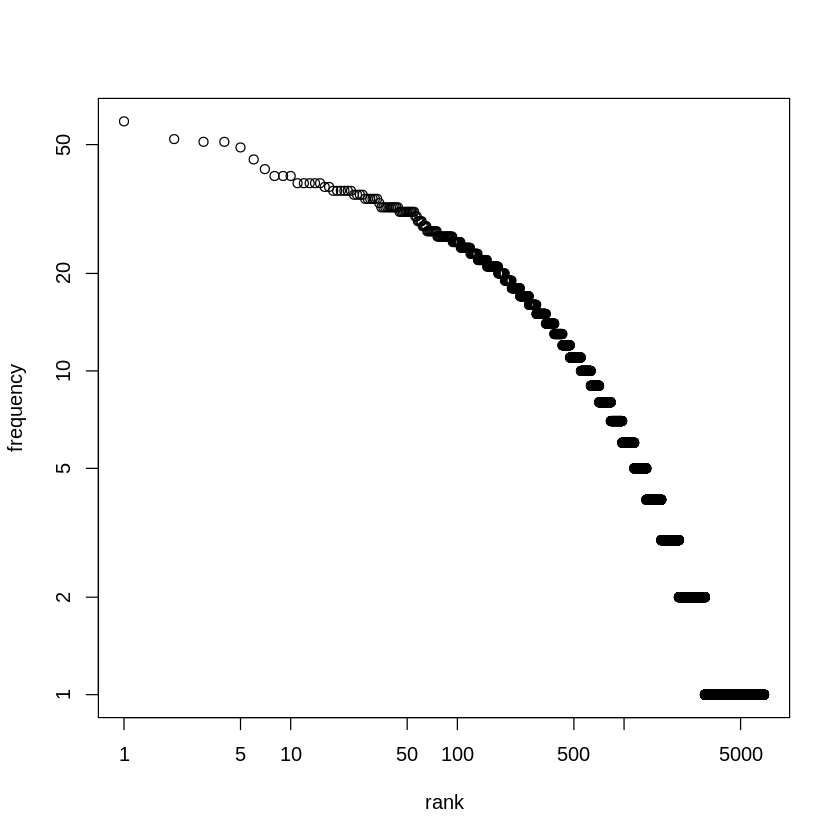

In [20]:
# Are the actor participations Zipf distributed
plot(colSums(movie_actor_matrix), , xlab = "rank", ylab = "frequency" )
plot(colSums(movie_actor_matrix), log="xy", xlab = "rank", ylab = "frequency")

In [21]:
# check the number of occurrences of a certain actor
actor <- "Brad Pitt"
sum(movie_actor_matrix[,actor])

[1] 37

## Which actors play together very often? - Creation of an actor times actor matrix
 value in cell(i, j) : number of shared apperances of actor i and actor j
 
 ![alt text](www/ben-stiller-owen-wilson.jpg "Ben Stiller & Owen Wilson")

### But first, let's talk about sparsity
In our movie_actor_matrix most of the cells have the value 0 and only few of them are value 1

In [34]:
# number of cells in movie_actor_matrix
nrow(movie_actor_matrix) * ncol(movie_actor_matrix)
# which of those have value '0'
length(which(movie_actor_matrix == 0))
# sparsity:
length(which(movie_actor_matrix == 0))/ (nrow(movie_actor_matrix) * ncol(movie_actor_matrix))

[1] 36006310

[1] 35982141

[1] 0.9993288

#### Rightnow with the current data type of @movie_actor_matrix every cell is saved seperately. THence the amount of storage space is very high.

In [25]:
class(movie_actor_matrix)
object.size(movie_actor_matrix)
paste(as.numeric(object.size(movie_actor_matrix))/1024^2,"MB")

[1] "matrix"

288971664 bytes

[1] "275.584854125977 MB"

### It would be completely sufficient to save the entries other than 0. The package Matrix can do just that.

In [22]:
library(Matrix)
sparse_movie_actor_matrix <- Matrix(movie_actor_matrix, sparse = T)
class(sparse_movie_actor_matrix)
object.size(sparse_movie_actor_matrix)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

1239968 bytes

In [23]:
# Lets compare the 2 object sizes
paste("regular",as.numeric(object.size(movie_actor_matrix))/1024^2,"MB")
paste("sparse",as.numeric(object.size(sparse_movie_actor_matrix))/1024^2,"MB")

[1] "regular 275.584854125977 MB"

[1] "sparse 1.18252563476562 MB"

### Actor times Actor Matrix can be calculated using Matrix multiplication of the movie_actor_matrix
> t(@a) : transpose @a  
>@a%*%@b : matrix multiplication of @a and @b

In [26]:
# create snippet to show mechanism
library(knitr)
library(IRdisplay)
actors_for_snippet <- c("Robert De Niro", "Owen Wilson", "Robin Williams", "Ben Stiller", "Matt Damon")
movies_for_snippet <- c("Zoolander 2", "Zoolander", "Starsky & Hutch", "Good Will Hunting", "Night at the Museum", "Night at the Museum: Battle of the Smithsonian", "Happy Feet Two", "Little Fockers", "Meet the Parents", "Awakenings")
snippet <- sparse_movie_actor_matrix[movies_for_snippet, actors_for_snippet]
as.matrix(snippet)%>%
    kable("html")%>%
    as.character() %>%
    display_html()


,Robert De Niro,Owen Wilson,Robin Williams,Ben Stiller,Matt Damon
Zoolander 2,0,1,0,1,0
Zoolander,0,1,0,1,0
Starsky & Hutch,0,1,0,1,0
Good Will Hunting,0,0,1,0,1
Night at the Museum,0,1,1,1,0
Night at the Museum: Battle of the Smithsonian,0,1,1,1,0
Happy Feet Two,0,0,1,0,1
Little Fockers,1,1,0,1,0
Meet the Parents,1,1,0,1,0
Awakenings,1,0,1,0,0


In [27]:
# transpose
as.matrix(t(snippet))%>%
    kable("html")%>%
    as.character() %>%
    display_html()

,Zoolander 2,Zoolander,Starsky & Hutch,Good Will Hunting,Night at the Museum,Night at the Museum: Battle of the Smithsonian,Happy Feet Two,Little Fockers,Meet the Parents,Awakenings
Robert De Niro,0,0,0,0,0,0,0,1,1,1
Owen Wilson,1,1,1,0,1,1,0,1,1,0
Robin Williams,0,0,0,1,1,1,1,0,0,1
Ben Stiller,1,1,1,0,1,1,0,1,1,0
Matt Damon,0,0,0,1,0,0,1,0,0,0


### Matrix Multiplication ([Wiki](https://de.wikipedia.org/wiki/Matrizenmultiplikation))

In [30]:
# Matrix multiplication
snippet_actor_actor_matrix <- t(snippet)%*%snippet
snippet_actor_actor_matrix
diag(snippet_actor_actor_matrix) <- 0
snippet_actor_actor_matrix

5 x 5 sparse Matrix of class "dgCMatrix"
               Robert De Niro Owen Wilson Robin Williams Ben Stiller Matt Damon
Robert De Niro              3           2              1           2          .
Owen Wilson                 2           7              2           7          .
Robin Williams              1           2              5           2          2
Ben Stiller                 2           7              2           7          .
Matt Damon                  .           .              2           .          2

5 x 5 sparse Matrix of class "dgCMatrix"
               Robert De Niro Owen Wilson Robin Williams Ben Stiller Matt Damon
Robert De Niro              0           2              1           2          .
Owen Wilson                 2           0              2           7          .
Robin Williams              1           2              0           2          2
Ben Stiller                 2           7              2           0          .
Matt Damon                  .           .              2           .          0

In [32]:
# Appliation on whole data set
actor_actor_matrix <- t(sparse_movie_actor_matrix)%*%sparse_movie_actor_matrix
diag(actor_actor_matrix) <- 0

In [33]:
# most joint appearances
max(actor_actor_matrix)

indices <- which(actor_actor_matrix > 5,arr.ind = T)
# actor_actor_matrix is symetrical; hence we can unify pairs (a, b) and (b, a)
indices < indices[!duplicated(t(apply(indices, 1, sort))),]
most_frequent_pairs<-data.frame(actor1 = rownames(actor_actor_matrix)[indices[,1]],
                                actor2 = colnames(actor_actor_matrix)[indices[,2]],
                                count = actor_actor_matrix[indices])
most_frequent_pairs[order(most_frequent_pairs$count, decreasing=T),]

# lets create a function for theese steps
get_top_n_pairs <- function(matrix, n){
    indices <- which(matrix >= sort(as.matrix(matrix),decreasing = T)[n*2],arr.ind = T)
    indices <- indices[!duplicated(t(apply(indices, 1, sort))),]
    most_frequent_pairs<-data.frame(actor1 = rownames(matrix)[indices[,1]],
                                    actor2 = colnames(matrix)[indices[,2]],
                                    sig = matrix[indices],
                                    stringsAsFactors = FALSE)
    return(most_frequent_pairs)
}

[1] 9

,actor1,actor2,count
,<fct>,<fct>,<dbl>
3,Ben Stiller,Owen Wilson,9
11,Robbie Coltrane,Emma Watson,8
12,Daniel Radcliffe,Emma Watson,8
13,Rupert Grint,Emma Watson,8
20,Rupert Grint,Daniel Radcliffe,8
4,Dom DeLuise,Burt Reynolds,7
8,Rupert Grint,Alan Rickman,7
18,Daniel Radcliffe,Robbie Coltrane,7
19,Rupert Grint,Robbie Coltrane,7


### Co-occurrence significance calculation
More meaningful than a mere shared occurrence frequency would be the application of significance measures. Different significance-measures can be used.  
3 different significance measures are implemented in the tmca.cooccurrence package.

In [35]:
library(tmca.cooccurrence)
coocsCalc <- Coocc$new(binDTM = sparse_movie_actor_matrix)
coocsCalc$set_minCoocFreq(2)
coocsCalc$set_significanceThreshold(0)

# log likelihood
coocsCalc$set_measure("LOGLIK")
sig_log <- coocsCalc$ccoocs()
diag(sig_log) <- 0 

# Dice
#coocsCalc$set_measure("DICE")
#sig_dice <- coocsCalc$ccoocs()
#diag(sig_dice) <- 0 

# Mutual information
#coocsCalc$set_measure("MI")
#sig_mi <- coocsCalc$ccoocs()
#diag(sig_mi) <- 0 



Loading required package: testthat


In [36]:
log_likelihood_top_pairs <- get_top_n_pairs(matrix = sig_log, n = 25)
log_likelihood_top_pairs <- log_likelihood_top_pairs[order(log_likelihood_top_pairs$sig,decreasing = T),]
# append individual occurrences and shared occurrences
occurrences_actor1 <- NULL
occurrences_actor2 <- NULL
shared_occurrences <- NULL
for(i in 1:nrow(log_likelihood_top_pairs)){
    occurrences_actor1 <- c(occurrences_actor1, sum(movie_actor_matrix[,log_likelihood_top_pairs$actor1[i]]))
    occurrences_actor2 <- c(occurrences_actor2, sum(movie_actor_matrix[,log_likelihood_top_pairs$actor2[i]]))
    shared_occurrences <- c(shared_occurrences, actor_actor_matrix[log_likelihood_top_pairs$actor1[i],
                                                                   log_likelihood_top_pairs$actor2[i]]
                           )
}

log_likelihood_top_pairs<-data.frame(log_likelihood_top_pairs,
                                     'Occurrences Actor1' = occurrences_actor1,
                                      'Occurrences Actor2' = occurrences_actor2,
                                      'Shared Occurrences' = shared_occurrences
                                    )
log_likelihood_top_pairs

,actor1,actor2,sig,Occurrences.Actor1,Occurrences.Actor2,Shared.Occurrences
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
15,Rupert Grint,Daniel Radcliffe,94.36328,10,12,8
8,Rupert Grint,Emma Watson,86.13625,10,17,8
7,Daniel Radcliffe,Emma Watson,80.87591,12,17,8
6,Robbie Coltrane,Emma Watson,77.03826,14,17,8
14,Rupert Grint,Robbie Coltrane,74.94342,10,14,7
13,Daniel Radcliffe,Robbie Coltrane,70.86612,12,14,7
17,Leonard Nimoy,William Shatner,68.27510,9,10,6
4,Rupert Grint,Alan Rickman,66.09546,10,23,7
25,Nichelle Nichols,DeForest Kelley,65.33608,4,4,4


### Now we can bring all theese information into an interactive R Shiny Application
[Link to Shiny App](http://139.18.2.146:3838/Movie%20Netwotk/)